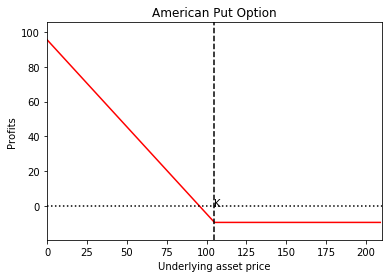

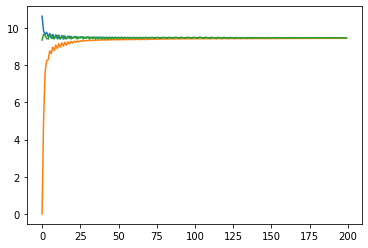

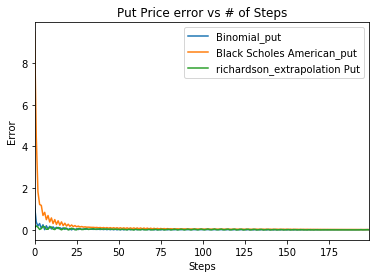

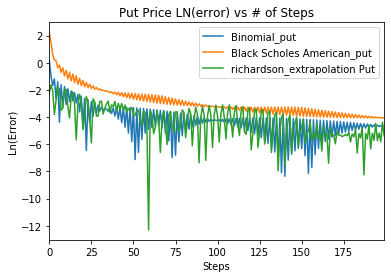

In [4]:

import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

# Binomial Tree Option Valuation Cox, Ross, Rubinstein method by "www.quantandfinancial.com"
import matplotlib.pyplot as plt
import numpy as np

def Binomial(n, S, K, r, v, t, PutCall):  
    At = t/n 
    u = np.exp(v*np.sqrt(At))
    d = 1./u
    p = (np.exp(r*At)-d) / (u-d) 

    #Binomial price tree
    stockvalue = np.zeros((n+1,n+1))
    stockvalue[0,0] = S
    for i in range(1,n+1):
        stockvalue[i,0] = stockvalue[i-1,0]*u
        for j in range(1,i+1):
            stockvalue[i,j] = stockvalue[i-1,j-1]*d
    
    #option value at final node   
    optionvalue = np.zeros((n+1,n+1))
    for j in range(n+1):
        if PutCall=="C": # Call
            optionvalue[n,j] = max(0, stockvalue[n,j]-K)
        elif PutCall=="P": #Put
            optionvalue[n,j] = max(0, K-stockvalue[n,j])
    
    #backward calculation for option price    
    for i in range(n-1,-1,-1):
        for j in range(i+1):
                if PutCall=="P":
                    optionvalue[i,j] = max(0,
                                           K-stockvalue[i,j],
                                           np.exp(-r*At)*(p*optionvalue[i+1,j]+(1-p)*optionvalue[i+1,j+1]))

                elif PutCall=="C":
                    optionvalue[i,j] = max(0,
                                           stockvalue[i,j]-K,
                                           np.exp(-r*At)*(p*optionvalue[i+1,j]+(1-p)*optionvalue[i+1,j+1]))
    return optionvalue[0,0]

# Inputs
n = 300 #input("Enter number of binomial steps: ")           #number of steps
S = 100 #input("Enter the initial underlying asset price: ") #initial underlying asset price
r = 0.03 #input("Enter the risk-free interest rate: ")        #risk-free interest rate
K = 105 #input("Enter the option strike price: ")            #strike price
v = 0.2 #input("Enter the volatility factor: ")              #volatility
t = 1.

"""### put"""

z = [-x + K - Binomial(n, S, K, r, v, t, "P") for x in range(K)] 
z += [-Binomial(n, S, K, r, v, t, "P")] * (K)

plt.plot(range(2*K), z, color='red')
plt.axis([0, 2*K, min(z) - 10, max(z) + 10])
plt.xlabel('Underlying asset price')
plt.ylabel('Profits')
plt.axvline(x=K, linestyle='--', color='black')
plt.axhline(y=0, linestyle=':', color='black')
plt.title('American Put Option')
plt.text(105, 0, 'K')
plt.show()

"""###  Plot the Put Price Over time"""

price_list_of_Binomial_put=[]
for i in range(1,201):
    price_list_of_Binomial_put.append(Binomial(i, S, K, r, v, t, "P"))
    
plt.plot(price_list_of_Binomial_put)

len(price_list_of_Binomial_put)

"""### Balck Scholes

![image.png](attachment:image.png)

### Black Scholes Library
http://code.mibian.net/
"""

import mibian

"""BS([underlyingPrice, strikePrice, interestRate,
 daysToExpiration], volatility=x, callPrice=y, putPrice=z)"""

c=mibian.BS([100,105,3,365],volatility=20)
c.putPrice

def american_put_black_scholes(initial_stock_price, strike_price, rf_rate, maturity, sigma, num_steps):
    # Parameter initialization
    deltaT = maturity/num_steps
    up_factor = np.exp(sigma*np.sqrt(deltaT))
    down_factor = 1.0/up_factor
    p = (np.exp(rf_rate*deltaT)-down_factor)/(up_factor-down_factor)
    
    # Binomial Price Tree
    stock_values = np.zeros((num_steps+1, num_steps+1))
    stock_values[0,0] = initial_stock_price
    
    for i in range(1, num_steps+1):
        stock_values[i, 0] = stock_values[i-1, 0]*up_factor
        for j in range(1, i+1):
            stock_values[i, j] = stock_values[i-1, j-1] * down_factor
#    savetxt('stock_values.csv', stock_values, delimiter=',')        
    
    # Option Price at Final Node
    option_values = np.zeros((num_steps+1, num_steps+1))
    
    for i in range(num_steps+1):
        option_values[num_steps, i] = max(0, strike_price-stock_values[num_steps, i])
        
    # Backward calculation for initial options price
    for j in range(num_steps-1):
        option_values[num_steps, j] = mibian.BS([100,105,3,365],volatility=20).putPrice
        
    for i in range(num_steps-2, -1, -1):
        for j in range(i+1):
            option_values[i, j] = max(0, 
                                      strike_price - stock_values[i, j], 
                                      np.exp(-rf_rate*deltaT) * (p * option_values[i+1, j] + (1-p) * option_values[i+1, j+1]))
#    savetxt('option_values.csv', option_values, delimiter=',')
    return option_values[0,0]

price_list_of_American_put=[]
for i in range(1,201):
    price_list_of_American_put.append(american_put_black_scholes(100,105,.03,1,.2,i))
    
plt.plot(price_list_of_American_put)

len(price_list_of_American_put)

def richardson_extrapolation(initial_stock_price,
                             strike_price,
                             rf_rate, maturity,
                             sigma,
                             num_steps):
    Two_BBSN = 2 * american_put_black_scholes(initial_stock_price,
                                              strike_price,
                                              rf_rate, maturity,
                                              sigma, num_steps)
    
    BBSN_div_two = american_put_black_scholes(initial_stock_price,
                                              strike_price,
                                              rf_rate,
                                              maturity,
                                              sigma,
                                              int(num_steps/2))
    
    return float(Two_BBSN-BBSN_div_two)

richardson_extrapolation(100,105,.03,1,.2,200)

price_list_of_American_put_richardson_extrapolation=[]
for i in range(25,225):
    price_list_of_American_put_richardson_extrapolation.append(richardson_extrapolation(100,105,.03,1,.2,i))
    
plt.plot(price_list_of_American_put_richardson_extrapolation)

len(price_list_of_American_put_richardson_extrapolation)

df_summary=pd.DataFrame({"Binomial_put":price_list_of_Binomial_put,
              "Black Scholes American_put":price_list_of_American_put,
              "richardson_extrapolation Put":price_list_of_American_put_richardson_extrapolation})  
df_summary_abs_error=abs(df_summary-9.472992)

df_summary_abs_error.plot()
plt.title('Put Price error vs # of Steps')
plt.xlabel('Steps')
plt.ylabel('Error')
plt.show()

np.log(df_summary_abs_error).plot()
plt.title('Put Price LN(error) vs # of Steps')
plt.xlabel('Steps')
plt.ylabel('Ln(Error)')
plt.show()















